# Getting the Data


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('banned_books.csv')
df.head(3)

,goodreads_image_url,title,author,goodreads_published_date,goodreads_description,goodreads_tags,type_of_ban,state,district,ban_date,origin_of_challenge,goodreads_product_url,amazon_url,secondary_authors,illustrators,translators
0,https://images-na.ssl-images-amazon.com/images...,Ace of Spades,"Àbíké-Íyímídé, Faridah",2021-06-01,An incendiary and utterly compelling thriller ...,"dark, lgbtqia+, black, young adult, gay romanc...",Banned in Libraries and Classrooms,Florida,Indian River County School District,November 2021,Administrator,https://www.goodreads.com/book/show/42603984-a...,https://www.amazon.com/Ace-Spades-Faridah-Abik...,NaN,NaN,NaN
1,https://images-na.ssl-images-amazon.com/images...,Clap When You Land,"Acevedo, Elizabeth",2020-05-05,In a novel in verse that brims with grief and ...,"young adult, poetry, contemporary, fiction, au...",Banned in Classrooms,Pennsylvania,Central York School District,September 2021,Administrator,https://www.goodreads.com/book/show/52516332-c...,https://www.amazon.com/Clap-When-Land-Elizabet...,NaN,NaN,NaN
2,https://images-na.ssl-images-amazon.com/images...,The Poet X,"Acevedo, Elizabeth",2018-03-06,Fans of Jacqueline Woodson Meg Medina and Ja...,"poetry, young adult, contemporary, fiction, au...",Banned in Libraries,Florida,Indian River County School District,November 2021,Administrator,https://www.goodreads.com/book/show/33294200-t...,https://www.amazon.com/Poet-X-Elizabeth-Aceved...,NaN,NaN,NaN


# Setting up Environment in PyCaret
The setup() function initializes the environment in pycaret and performs several text pre-processing steps that are imperative to work with NLP problems. setup must be called before executing any other function in pycaret. It takes two parameters: pandas dataframe and name of the text column passed as target parameter. You can also pass a list containing text, in which case you don't need to pass target parameter. When setup is executed, following pre-processing steps are applied automatically:

* Removing Numeric Characters: All numeric characters are removed from the text. They are replaced with blanks.


* Removing Special Characters: All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.


* Word Tokenization: Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. Read More 


* Stopword Removal: A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. Read More 


* Bigram Extraction: A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York" Read More 


* Trigram Extraction: Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. Read More 


* Lemmatizing: Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. Read More 


* Custom Stopwords: Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. 

Note : Some functionalities in pycaret.nlp requires english language model. The language model is not downloaded automatically when you install pycaret. You will have to download these python command line interface such as Anaconda Prompt. To download the model, please type the following in your command line:
python -m spacy download en_core_web_sm 
python -m textblob.download_corpora 

In [2]:
from pycaret.nlp import *

In [3]:
data = df[['goodreads_description']]
data.head()

,goodreads_description
0,An incendiary and utterly compelling thriller ...
1,In a novel in verse that brims with grief and ...
2,Fans of Jacqueline Woodson Meg Medina and Ja...
3,Fans of Jacqueline Woodson Meg Medina and Ja...
4,Fans of Jacqueline Woodson Meg Medina and Ja...


In [4]:
%time exp_nlp101 = setup(data = data,target = 'goodreads_description',session_id = 123)

Description,Value
session_id,123
Documents,2532
Vocab Size,10272
Custom Stopwords,False


CPU times: user 15.4 s, sys: 218 ms, total: 15.7 s
Wall time: 16.7 s


Once the setup is succesfully executed it prints the information grid with the following information:

* session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as 123 for later reproducibility.


* #Documents : Number of documents (or samples in dataset if dataframe is passed). 


* Vocab Size : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc. 

# Create a Topic Model(s)


In [5]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [6]:
%time tuned_lda = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 400 | Coherence: 0.4462
CPU times: user 2min 51s, sys: 1min 58s, total: 4min 49s
Wall time: 3min 58s


In [7]:
%time tuned_lsi = tune_model(model = 'lsi', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Best Model: Latent Semantic Indexing | # Topics: 2 | Coherence: 0.4792
CPU times: user 1min 46s, sys: 58 s, total: 2min 44s
Wall time: 1min 56s


In [8]:
%time tuned_hdp = tune_model(model = 'hdp', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Hierarchical Dirichlet Process | # Topics: 32 | Coherence: 0.6604
CPU times: user 3min 43s, sys: 2min 26s, total: 6min 9s
Wall time: 3min 58s


In [9]:
%time lda = create_model('lda', num_topics = 8, multi_core = True)

CPU times: user 2.37 s, sys: 496 ms, total: 2.87 s
Wall time: 3.45 s


In [10]:
%time lsi = create_model('lsi', num_topics = 8, multi_core = True)

CPU times: user 1.42 s, sys: 2.08 s, total: 3.5 s
Wall time: 658 ms


In [11]:
%time hdp = create_model('hdp', num_topics = 8, multi_core = True)

CPU times: user 3.2 s, sys: 965 ms, total: 4.16 s
Wall time: 3.05 s


In [12]:
%time rp = create_model('rp', num_topics = 8, multi_core = True)

CPU times: user 11.3 ms, sys: 2.25 ms, total: 13.5 ms
Wall time: 13.9 ms


In [13]:
%time nmf = create_model('nmf', num_topics = 8, multi_core = True)

CPU times: user 220 ms, sys: 278 ms, total: 497 ms
Wall time: 184 ms


# Assign a Model

In [14]:
lda_results = assign_model(lda)
lda_results.head()

,goodreads_description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic,Perc_Dominant_Topic
0,utterly compelling thriller shocking twist del...,0.601538,0.126266,0.047363,0.002162,0.025873,0.002161,0.002161,0.192477,Topic 0,0.60
1,novel verse grief national book award_winne au...,0.002321,0.002321,0.002322,0.002319,0.245770,0.002322,0.002319,0.740306,Topic 7,0.74
2,jason_reynold fall hard astonish new_york_time...,0.379875,0.001693,0.609972,0.001691,0.001692,0.001692,0.001691,0.001693,Topic 2,0.61
3,jason_reynold fall hard astonish new_york_time...,0.379858,0.001693,0.609989,0.001691,0.001692,0.001692,0.001691,0.001693,Topic 2,0.61
4,jason_reynold fall hard astonish new_york_time...,0.379855,0.001693,0.609992,0.001691,0.001692,0.001692,0.001691,0.001693,Topic 2,0.61


In [16]:
lsi_results = assign_model(lsi)
lsi_results.head()

,goodreads_description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic
0,utterly compelling thriller shocking twist del...,1.634587,0.330639,1.347528,0.098698,-0.207613,0.726931,0.058514,0.411741,Topic 0
1,novel verse grief national book award_winne au...,1.924094,-0.359153,0.161969,-0.472761,0.099791,-0.606523,-0.661747,-0.179423,Topic 0
2,jason_reynold fall hard astonish new_york_time...,2.872970,0.475517,0.618986,-0.349842,1.912076,0.639538,0.084683,0.580926,Topic 0
3,jason_reynold fall hard astonish new_york_time...,2.872970,0.475517,0.618986,-0.349842,1.912076,0.639538,0.084683,0.580926,Topic 0
4,jason_reynold fall hard astonish new_york_time...,2.872970,0.475517,0.618986,-0.349842,1.912076,0.639538,0.084683,0.580926,Topic 0


In [17]:
hdp_results = assign_model(hdp)
hdp_results.head()

,goodreads_description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic
0,utterly compelling thriller shocking twist del...,0.991359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Topic 0
1,novel verse grief national book award_winne au...,0.990719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Topic 0
2,jason_reynold fall hard astonish new_york_time...,0.993228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Topic 0
3,jason_reynold fall hard astonish new_york_time...,0.993228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Topic 0
4,jason_reynold fall hard astonish new_york_time...,0.993228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Topic 0


In [18]:
rp_results = assign_model(rp)
rp_results.head()

,goodreads_description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic
0,utterly compelling thriller shocking twist del...,1.767767,1.767767,0.353553,3.889087,-1.767767,-1.060660,-2.474874,-1.060660,Topic 3
1,novel verse grief national book award_winne au...,3.181981,-1.060660,-1.767767,-1.060660,1.060660,2.474873,-1.060660,2.474874,Topic 0
2,jason_reynold fall hard astonish new_york_time...,-1.767767,-1.767767,1.060660,1.060660,-0.353553,5.303300,-6.717514,-3.181980,Topic 5
3,jason_reynold fall hard astonish new_york_time...,-1.767767,-1.767767,1.060660,1.060660,-0.353553,5.303300,-6.717514,-3.181980,Topic 5
4,jason_reynold fall hard astonish new_york_time...,-1.767767,-1.767767,1.060660,1.060660,-0.353553,5.303300,-6.717514,-3.181980,Topic 5


In [19]:
nmf_results = assign_model(nmf)
nmf_results.head()

,goodreads_description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic,Perc_Dominant_Topic
0,utterly compelling thriller shocking twist del...,3.779510e-20,0.015884,0.0,0.00000,0.000454,0.000000,0.002764,0.0,Topic 1,0.83
1,novel verse grief national book award_winne au...,0.000000e+00,0.019022,0.0,0.00000,0.000000,0.000088,0.000000,0.0,Topic 1,1.00
2,jason_reynold fall hard astonish new_york_time...,0.000000e+00,0.020699,0.0,0.00169,0.000000,0.000000,0.000000,0.0,Topic 1,0.92
3,jason_reynold fall hard astonish new_york_time...,0.000000e+00,0.020699,0.0,0.00169,0.000000,0.000000,0.000000,0.0,Topic 1,0.92
4,jason_reynold fall hard astonish new_york_time...,0.000000e+00,0.020699,0.0,0.00169,0.000000,0.000000,0.000000,0.0,Topic 1,0.92


Dominant_Topic is the topic number with highest proportion and Perc_Dominant_Topic is the percentage of dominant topic over 1 (only shown when models are stochastic i.e. sum of all proportions equal to 1) .

# Plot a Model
plot_model() function can be used to analyze the overall corpus or only specific topics extracted through topic model. Hence the function plot_model() can also work without passing any trained model object.

In [20]:
plot_model(nmf)

### 9.2 Top 100 Bigrams on Entire Corpus

In [21]:
plot_model(nmf, plot = 'bigram')

### Frequency Distribution of Topic 1
plot_model() can also be used to analyze the same plots for specific topics. To generate plots at topic level, function requires trained model object to be passed inside plot_model(). In example below we will generate frequency distribution on Topic 1 only as defined by topic_num parameter.

In [22]:
plot_model(nmf, plot = 'frequency', topic_num = 'Topic 1')

### 9.4 Topic Distribution

In [23]:
plot_model(nmf, plot = 'topic_distribution')

### T-distributed Stochastic Neighbor Embedding (t-SNE)

In [24]:
plot_model(nmf, plot = 'tsne')

### Uniform Manifold Approximation and Projection Plot

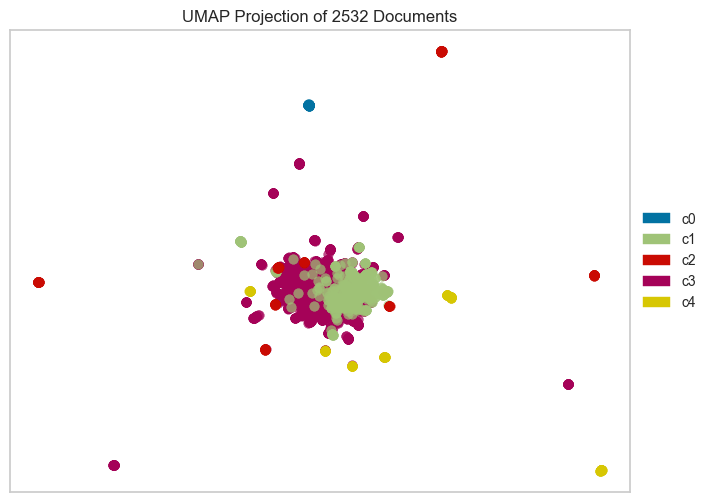

In [25]:
plot_model(nmf, plot = 'umap')

# Evaluate Model

In [26]:
evaluate_model(nmf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

### Saving the model

In [28]:
save_model(nmf,'nmf_model')

Model Succesfully Saved


(NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
     n_components=8, random_state=123, shuffle=False, solver='cd', tol=0.0001,
     verbose=0),
 'nmf_model.pkl')

### Loading the model
To load a saved model on a future date in the same or different environment, we would use the PyCaret's load_model() function.

In [29]:
saved_lda = load_model('nmf_model')

Model Sucessfully Loaded


In [30]:
print(saved_lda)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=8, random_state=123, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)
